In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt


In [6]:
# reading a csv file
weight = pd.read_csv("E:\\Data Science\\Assignments\\15. Simple Linear Regression\\calories_consumed.csv")
print(weight.head())
print(".....................................................")
print("number of columns",weight.shape[1])
print("number of rows/records",weight.shape[0])

   Weight_gained  Calories_Consumed
0            108               1500
1            200               2300
2            900               3400
3            200               2200
4            300               2500
.....................................................
number of columns 2
number of rows/records 14


In [12]:
weight.info()
print("...........................................")
print(weight.isnull().sum())                 #checking for null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weight_gained        14 non-null int64
Calories_Consumed    14 non-null int64
dtypes: int64(2)
memory usage: 352.0 bytes
...........................................
Weight_gained        0
Calories_Consumed    0
dtype: int64


In [7]:
weight.describe()    

,Weight_gained,Calories_Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


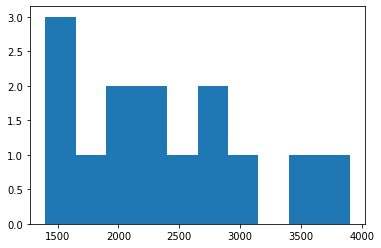

In [8]:
#analysing the data using visualization
plt.hist(weight.Calories_Consumed)
plt.show()

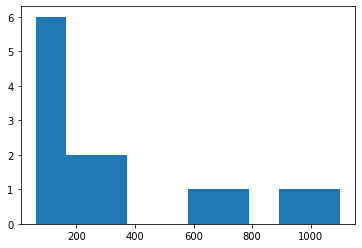

In [9]:
plt.hist(weight.Weight_gained)
plt.show()

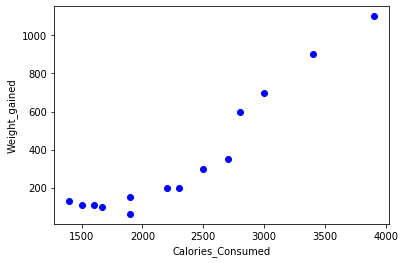

In [10]:
plt.plot(weight["Calories_Consumed"],weight["Weight_gained"], "bo")
plt.xlabel("Calories_Consumed")
plt.ylabel("Weight_gained")
plt.show()

In [11]:
#correlation value between feature and outcome
print(np.corrcoef(weight.Calories_Consumed,weight.Weight_gained))


[[1.         0.94699101]
 [0.94699101 1.        ]]


In [12]:
#start  training model
model=smf.ols('Weight_gained~Calories_Consumed', data=weight).fit()
print(model.params)        #getting models parameter
print(model.summary())    #summary of models(p value,r square value etc.)
          #r square 0.897

Intercept           -625.752356
Calories_Consumed      0.420157
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Weight_gained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.86e-07
Time:                        21:01:30   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [13]:
print(model.conf_int(0.05))   #95% confidence level

                            0           1
Intercept         -845.426655 -406.078057
Calories_Consumed    0.330506    0.509807


In [14]:
pred=model.predict(weight.iloc[:,:])      #predict the value of weight gained using trained model
print(pred.head(10))

0       4.482599
1     340.607908
2     802.780209
3     298.592245
4     424.639236
5      46.498263
6     -37.533065
7     172.545254
8     550.686227
9    1012.858527
dtype: float64


In [15]:
#rmse for given model
rmse=np.sqrt(np.mean((pred-weight.Weight_gained)**2))
print(rmse)                                         #103.302 RMSE


103.30250194726932


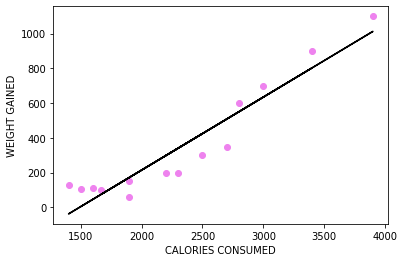

In [16]:
#visualization of regression line using matplotlib
plt.scatter(x=weight['Calories_Consumed'],y=weight['Weight_gained'],color='violet')
plt.plot(weight['Calories_Consumed'],pred,color='black')
plt.xlabel('CALORIES CONSUMED')
plt.ylabel('WEIGHT GAINED')
plt.show()


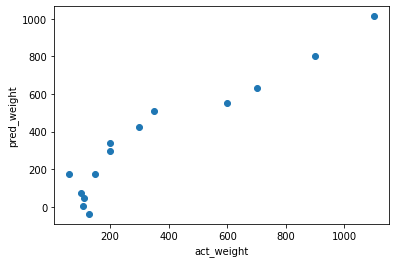

In [17]:
plt.scatter(x=weight.Weight_gained, y=pred)
plt.xlabel('act_weight')
plt.ylabel('pred_weight')
plt.show()                                                                    #actual weight vs predicted weight

In [18]:
#looking for alternate model like quadratic or exponential
   #quadratic model
weight["Calories_Consumed_square"]=weight.Calories_Consumed*weight.Calories_Consumed
print(weight.head())

   Weight_gained  Calories_Consumed  Calories_Consumed_square
0            108               1500                   2250000
1            200               2300                   5290000
2            900               3400                  11560000
3            200               2200                   4840000
4            300               2500                   6250000


In [19]:
model_quad=smf.ols("Weight_gained~Calories_Consumed+Calories_Consumed_square",data=weight).fit()
print(model_quad.params)
print(model_quad.summary())       # r square 0.952

Intercept                   203.258458
Calories_Consumed            -0.291894
Calories_Consumed_square      0.000140
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Weight_gained   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           5.55e-08
Time:                        21:01:47   Log-Likelihood:                -79.425
No. Observations:                  14   AIC:                             164.9
Df Residuals:                      11   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.0

In [21]:
print(model_quad.conf_int(0.05))

                                   0           1
Intercept                -332.955294  739.472210
Calories_Consumed          -0.736713    0.152925
Calories_Consumed_square    0.000053    0.000226


In [33]:
pred_quad=model_quad.predict(weight.iloc[:,:3])
print(pred_quad.head())

0     79.333455
1    269.953635
2    823.649454
3    236.359838
4    345.512323
dtype: float64


In [34]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-weight.Weight_gained)**2))
print(rmse_quad)                                     #70.407 rs

70.40751529831554


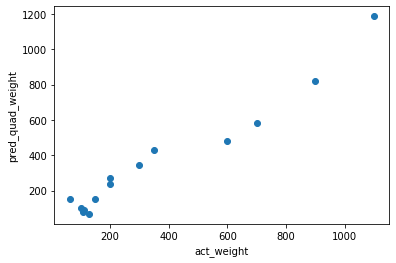

In [35]:
plt.scatter(x=weight.Weight_gained, y=pred_quad)
plt.xlabel("act_weight")
plt.ylabel("pred_quad_weight")
plt.show()

In [ ]:
     #conclusion:
       -both model linear&quadratic are same in accuracy
       -linear model(r square=0.957,rmse=103.302 rs)
       -quadratic model(r square=0.957, rmse=70.407)
       -The lower the RMSE value the better the model, so here quadratic model is the best fit model